In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
df = yf.download('BTC-USD', start='2013-01-01')

[*********************100%***********************]  1 of 1 completed


In [69]:
df['SMA'] = df.Close.rolling(window=20).mean()

In [70]:
df['stddev'] = df.Close.rolling(window=20).std()

In [71]:
df['Upper'] = df.SMA + 2* df.stddev
df['Lower'] = df.SMA - 2* df.stddev

In [72]:
df['Buy_Signal'] = np.where(df.Lower > df.Close, True, False)

In [73]:
df['Sell_Signal'] = np.where(df.Upper < df.Close, True, False)

In [74]:
df = df.dropna()

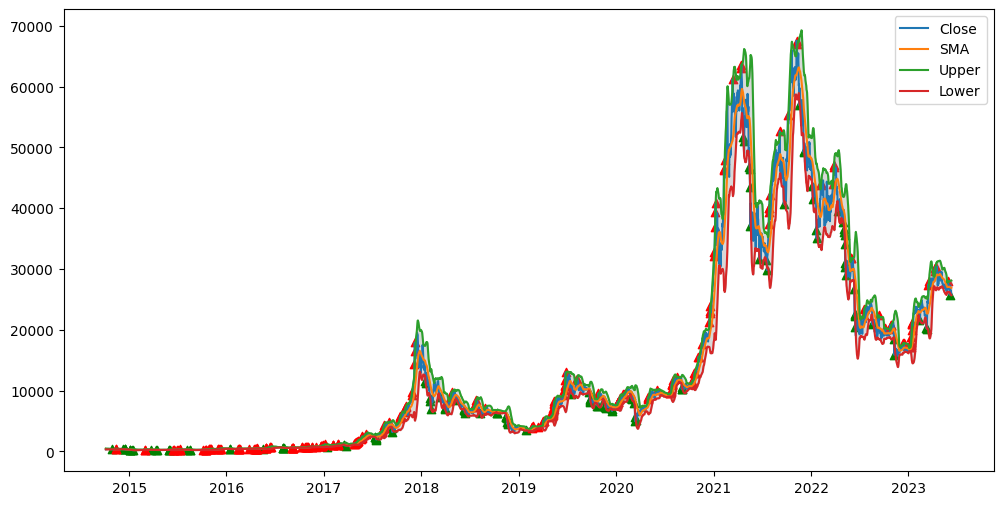

In [75]:
plt.figure(figsize=(12,6))
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])
plt.scatter(df.index[df.Buy_Signal], df[df.Buy_Signal].Close, marker='^', color='g')
plt.scatter(df.index[df.Sell_Signal], df[df.Sell_Signal].Close, marker='^', color='r')
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])
plt.show()

In [76]:
buys = []
sells = []
open_pos=False

for i in range(len(df)):
    if df.Lower[i] > df.Close[i]:
        if open_pos==False:
            buys.append(i)
            open_pos = True
    elif df.Upper[i] < df.Close[i]:
        if open_pos:
            sells.append(i)
            open_pos = False

In [77]:
buys

[23,
 65,
 169,
 306,
 466,
 591,
 664,
 828,
 893,
 1008,
 1073,
 1198,
 1313,
 1402,
 1466,
 1744,
 1813,
 1866,
 1968,
 2159,
 2390,
 2542,
 2600,
 2744,
 2806,
 2874,
 2955,
 3048,
 3164]

In [78]:
sells

[37,
 147,
 253,
 365,
 496,
 599,
 698,
 850,
 932,
 1034,
 1102,
 1287,
 1380,
 1421,
 1596,
 1764,
 1846,
 1918,
 2032,
 2195,
 2485,
 2557,
 2681,
 2793,
 2842,
 2898,
 2990,
 3084]

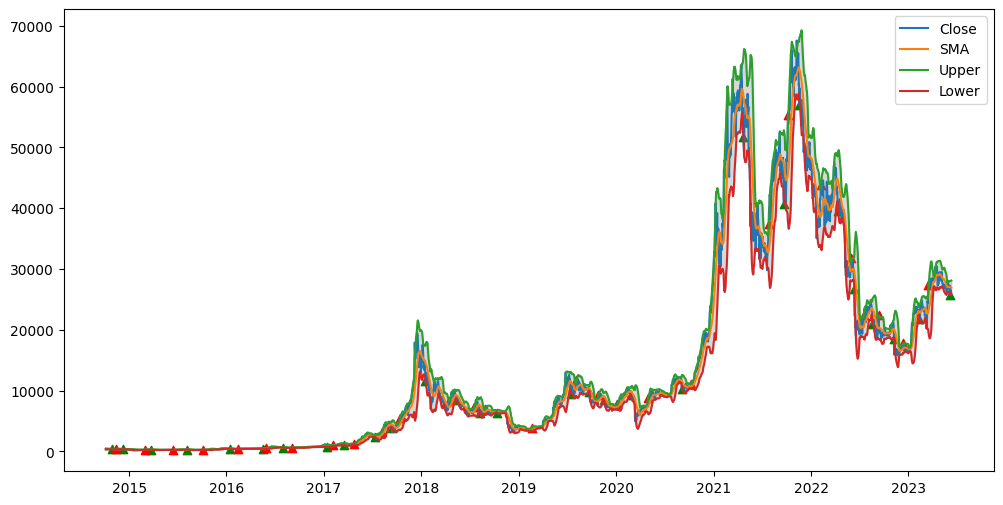

In [79]:
plt.figure(figsize=(12,6))
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])
plt.scatter(df.iloc[buys].index, df.iloc[buys].Close, marker='^', color='g')
plt.scatter(df.iloc[sells].index, df.iloc[sells].Close, marker='^', color='r')
plt.fill_between(df.index, df.Upper, df.Lower, color='grey', alpha=0.3)
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])
plt.show()

In [80]:
merged = pd.concat([df.iloc[buys].Close, df.iloc[sells].Close], axis=1)

In [81]:
merged

,Close,Close
Date,,
2014-10-29,335.591003,NaN
2014-11-12,NaN,423.561005
2014-12-10,346.364990,NaN
2015-03-02,NaN,275.670013
2015-03-24,245.595001,NaN
2015-06-16,NaN,250.895004
2015-08-08,260.997009,NaN
2015-10-06,NaN,246.063004
2016-01-15,364.330994,NaN


In [82]:
merged.columns = ['Buys', 'Sells']

In [83]:
merged

,Buys,Sells
Date,,
2014-10-29,335.591003,NaN
2014-11-12,NaN,423.561005
2014-12-10,346.364990,NaN
2015-03-02,NaN,275.670013
2015-03-24,245.595001,NaN
2015-06-16,NaN,250.895004
2015-08-08,260.997009,NaN
2015-10-06,NaN,246.063004
2016-01-15,364.330994,NaN


In [84]:
totalprofit = merged.shift(-1).Sells- merged.Buys

In [85]:
relprofits = (merged.shift(-1).Sells- merged.Buys)/merged.Buys

In [86]:
relprofits.mean()

0.02238288253388366